# CS 237 Spring 2021, HW 11 

#### Due date: Friday April 23rd at Midnight (1 minute after 11:59pm on 4/23) via Gradescope (with a 6 hour grace period)

<strong> Late policy:</strong> You may submit the homework up to 24 hours late for a 10% penalty. Hence, the late deadline is Saturday 4/24 at Midnight (with a 6 hour grace period). 

#### General Instructions

Please complete this notebook by filling in solutions where indicated. 

For full credit, please take careful note of the following requirements:

- Do NOT use any HTML tags in your notebook, as Gradescope will ignore them;

- Do NOT answer questions by including images, as Gradescope will ignore them; and 

- You MUST  "Restart and Run All" from the Kernel menu before submitting to Gradescope.

- You must present all numbers in readable form (approximately 4 digits of precision) unless otherwise stated. 

**Any assignments which do not follow these requirements will not receive full credit.** 



There are 8 problems on this homework, 4 on confidence intervals and 4 on hypothesis testing. In each group of 4, the first three will involve "made-up" data and the 4th will involve using Pandas to calculate with real data. 

In [24]:
# Here are some imports which will be used in code that we write for CS 237

import matplotlib.pyplot as plt   # normal plotting
import numpy as np
import pandas as pd

from math import log, pi, log, floor, ceil       # import whatever you want from math
#from random import seed, random
from collections import Counter


%matplotlib inline

from scipy.special import comb
           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


def round4(x):
    return np.around(x,4)


# Here are the basic statistical functions we will use from numpy

from numpy import mean, var, std, median, sqrt

from numpy.random import choice, seed

L = [2,4,3,6,4,5]

# mean value

mean(L)          


# Variance
#  ddof = delta degrees of freedom, default is 0

# population variance
var(L)      

# sample variance
var(L,ddof=1)

# Standard deviation
#  ddof = delta degrees of freedom, reduction in degrees of freedom:
#  for population stdev, this is 0 (the default value)
#  for sample stdev, should be 1

# population standard deviation
std(L)      

# sample standard deviation
std(L,ddof=1)  

# Median

median(L)  

# Random sampling of `size` elements from list with or without replacement

np.random.choice(L,size=1,replace=True)
       
# Scipy statistical functions

from scipy.stats import norm, binom, expon, geom, poisson, gamma, nbinom, bernoulli                 

# https://docs.scipy.org/doc/scipy/reference/stats.html

#### Normal Distribution    #####

######   Note that in this library loc = mean and scale = standard deviation  #####

# Examples assume random variable X (e.g., housing prices) normally distributed with  mu = 60, sigma = 10

# Probability Density Function    (really only useful for drawing the curve)
#  f(x) = P(X == x)

norm.pdf(x=50,loc=60, scale= 10)     

# Cumulative Density Function
#  F(x) = P(X < x)

# Example:  Percentage of houses less than 50K. 
norm.cdf(x=50,loc=60,scale=10) 

# Example:  Find P(60<X<80)
norm.cdf(x=80,loc=60,scale=40) - norm.cdf(x=60,loc=60,scale=40)

# Survival Function: Simply 1 - CDF, i.e., P(X > x)

# Example:  Percentage of houses more than 50K.
norm.sf(x=50,loc=60,scale=10) 

# Percentage Point Function: Inverse of the CDF:
# For what is the largest value of k for which P( X < k ) = q  ?

# Example: What is the maximum cost of the 5% cheapest houses, 
# i.e., the x such that P(X < x) = 0.05?

norm.ppf(q=0.05,loc=60,scale=40)

# Inverse Survival Function: Inverse (1 - CDF):
# For what is the smallest value of k for which P( X > k ) = q  ?

# Example: What is the minimum cost of the 5% most expensive houses, 
# i.e., the x such that P(X > x) = 0.05?

norm.isf(q=0.05,loc=60,scale=40)

#   Give the endpoints of the interval (centered on the mean)
#   which contain alpha/100 percent of the population (alpha is a probability)

# Ex. Give the interval for the middle 75% of the houses

norm.interval(alpha=0.75, loc=60, scale=40)

# generate a random variate
norm.rvs(loc=60, scale=40)

# generate random variates, returns list of length = size
norm.rvs(loc=60, scale=40, size=10)




#####   Exponential Distribution     ########

#####  loc = minimum value (leave at 0 always)               ##### 
#####  scale = mean = 1 / lambda (using textbook notation)   #####

# Probability Density Function  f(x)       (Only useful for graphing and showing shape)

lam = 4
expon.pdf(x=5,loc=0, scale=1/lam)        # Must use 'scale = 1/lambda' to be consistent with textbook and lecture  

# Cumulative Density Function
#  F(x) = P(X < x)

expon.cdf(x=5,loc=0,scale=1/lam) 

# Example:  Find P(6<X<8)
expon.cdf(x=8,loc=0,scale=1/lam) - expon.cdf(x=6,loc=0,scale=1/lam)

# Percentage Point Function: Inverse of the CDF:
# For which value of x does P( X < x ) = q  ?

expon.ppf(q=0.05,loc=0,scale=1/lam)

# Survival Function: Simply 1 - CDF, i.e., P(X > x)

expon.sf(x=5,loc=0,scale=1/lam) 

# Inverse Survival Function: Inverse (1 - CDF):
# For what is the value of k for which P( X > k ) = q  ?

expon.isf(q=0.05,loc=0,scale=1/lam)

#g. generate a random variate
expon.rvs(loc=0, scale=1/lam)

#h. generate random variates, returns list of length = size
expon.rvs(loc=0, scale=1/lam, size=10)

# Same for Poisson, nbinom, gamma, bernoulli, etc. as shown here:

##### Bernoulli Distribution  X ~ Bernoulli(p)  ####

#  p = probability of success for Bernoulli trial

# Generate a random variate
bernoulli.rvs(p=0.5)

# Generate a list of random variates
bernoulli.rvs(p=0.5,size=100)

##### Binomial Distribution  X ~ B(n,p)  ####

#  n = number of independent Bernoulli trials
#  p = probability of success for Bernoulli trial
#  k = outcome in range [0 .. n]

# Generate a random variate
binom.rvs(n=10, p=0.5)

# Generate a list of random variates
binom.rvs(n=10, p=0.5,size=100)

# Probability mass function: P(X = k)
binom.pmf(k=4, n=10, p=0.5)

# Cumulative distribution function: P(X <= k)
binom.cdf(k=4, n=10, p=0.5)


# percent error

def PE(observed, expected):
    return (observed - expected) / expected

print()

## Problem One 

For this problem, we will write some functions which will be useful in the rest of
the homework. Fill in the template below and verify correctness as shown. 

Hint: You may find the `norm.interval(...)` function useful. 

### Part A (Confidence Intervals)

In [25]:
# For confidence intervals:  Convert from a confidence level to a k value
# representing the number of standard deviations away from the mean (following the lecture slides)

def CL2Std(CL):
    return 0                 # just to get it to compile, put your code here


def Std2CL(sigma):
    return 0                 # just to get it to compile, put your code here


# test them!

# should print 1.95996398
print(np.around(CL2Std(0.95),8))

# should print 0.95449974
print(np.around(Std2CL(2),8))

# should return same value!
print(np.around(Std2CL(CL2Std(0.1111)),4))

# should return same value!
print(np.around(CL2Std(Std2CL(0.9999)),4))

0
0
0
0


### Part B (Hypothesis Testing)

In [26]:
# For hypothesis testing:  Convert from a level of significance to a pair of x values (for a two-sided test)
# or a single x value (for one-sided tests)

# For two-sided test, return numpy array [lb ub] for boundaries of the critical region of area equal to LOS
# in N(mu,sigma^2)

# mu is the hypothesis for the mean

def LOS2Bounds(mu,sigma,LOS):
    return [0,0]                 # just to get it to compile, put your code here 

# For lower one-sided test, return lower bound for non-critical region (x value 
# at the boundary between the critical region below and the non-critical region above)
# in N(mu,sigma^2)

def LOS2LB(mu,sigma,LOS):
    return 0                 # just to get it to compile, put your code here

# For upper one-sided test, return upper bound for non-critical region (x value 
# at the boundary between the critical region above and the non-critical region below)
# in N(mu,sigma^2)

def LOS2UB(mu,sigma,LOS):
    return 0                 # just to get it to compile, put your code here


# Test them!

# These examples are illustrated below in section on hypothesis testing

# should print [21.0801 28.9199] 
bounds = LOS2Bounds(25,2,0.05)
print(np.around(bounds,4))

# should print LOS 0.05
print(np.around(1-norm.cdf(bounds[1],25,2)+norm.cdf(bounds[0],25,2),4))

# should return 2.4369 
lb = LOS2LB(5,2,0.1)
print(np.around(lb,4))

# should print LOS 0.1
print(np.around(norm.cdf(lb,5,2),4))

# should return 1.6449 
ub = LOS2UB(0,1,0.05)
print(np.around(ub,4))

# should print LOS 0.05
print(np.around(1-norm.cdf(ub,0,1),4))

[0 0]
1.0
0
0.0062
0
0.5


## Problem Two (Confidence Intervals) 

Suppose an experiment is conducted where 100 students at BU are measured and their average height is found to be 67.45 inches, and  the (sample) standard deviation to be 2.93 inches. Since 100 is a large sample, we use
the sample standard deviation as an estimate of the population standard deviation. We may assume that heights are normally distributed.

(A) Suppose that you want to report the 95.45...% confidence interval (i.e., exactly 2 standard deviations). Give the results of this experiment as described in lecture. 

(B) Now suppose you want to report the precisely 95.0% confidence interval (which will be slightly less than 2 standard deviations -- find out the exact figure) Repeat (A) using this confidence interval. 


    A. Solution)
    
        Mean: 67.45
        Standard Deviation: 2.93
        Sample Size: 100
        Confidence: 95.45
        z at 95.45: 2.001
        
        Confidence interval: mean +- z(s squareroot(n))
        
        (67.45 - 2.001*(2.93/squareroot(100)), 67.45 + 2.001*(2.93/squareroot(100)
        
        = (66.86437, 68.0363)
        
        
        ANSWER:
        66.86437 <= 𝑥 <= 68.0363
        
    B. Solution)
        
        Confidence interval: 95%
        z at 95 is 1.96
        
        (67.45 - 1.96*(2.93/squareroot(100)), 67.45 + 1.96*(2.93/squareroot(100)
        
        = (66.8757, 68.0243)
        
        
        ANSWER:
        66.8757 <= 𝑥 <= 68.0243

## Problem Three (Confidence Intervals)

Suppose we want to estimate the lifetime of Apple iPads. An experiment is done where we sample 300 iPads to see how long they last, and the mean of this sample is found to be 3245.9 hours and the sample standard deviation to be 548.82 hours. 

(A) Report the mean lifetime of Apple iPads at a 95% level of confidence.

(B) Report the same at a 99% level of confidence.

In [27]:
print("\nSolution (A):")

mean = 3245.9
n = 300
sd = 548.82
SD = sd/(sqrt(n))

print(round4(norm.interval(alpha=.95, loc=3245.9, scale=SD)))





Solution (A):
[3183.7963 3308.0037]


In [28]:
print("\nSolution (B):")

print(round4(norm.interval(alpha=.99, loc=3245.9, scale=SD)))



Solution (B):
[3164.2819 3327.5181]


## Problem Four (Confidence Intervals on Real Data)

### Part A

First we will read in the biometric data on heights and weights from 

>    https://cs-web.bu.edu/fac/snyder/cs237/Data/biometricdata.csv

extract the weights into a Python list, find the ground truth about the mean and standard deviation,
then perform a sampling experiment. 

In order to reinforce our understanding of the CLT, AND to test our sampling procedure, we will also
verify that the predictions made by the CLT will be approximately correct. 

Complete the following template.

In [29]:
# read biometric data into Pandas data frame:

Bio = None          # just to get it to compile, your code here

# Convert column of all Weights into a Python list

W = [ 0 ]           # just to get it to compile, your code here



population_mean = mean(W)
population_std = std(W)


print(      )                                # just to get it to compile, your code here

# Randomly sample weight of N individuals return mean and *sample* standard deviation as a pair
# Use choice from numpy.random
# Ok to just do it with replace=True

def get_sample_parameters(P,N):
                                             # just to get it to compile, your code here
    return (0,0)                             

# test it!

# Try it without the seed and watch what happens, then use the seed before submit

seed(0)


(x_bar_30,sigma_sample_30) = get_sample_parameters(W,30)


print(     )                                   # just to get it to compile, your code here  

seed(0)


(x_bar_100,sigma_sample_100) = get_sample_parameters(W,100)


TypeError: 'float' object is not callable

Hint: You should get something very close to:

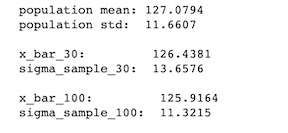

### Part B

Now we will warm up by verifying the CLT on our data: if we perform the sampling experiment for $N=100$ with
$10^4$ trials, we should get a normal distribution with approximately the same mean. 

Complete the following template. 

In [ ]:
# Collect together the sample means from 10**4 samples (you can ignore the sample standard deviations for now)

# print out the mean of the collection of means, and also print out
# the percent error compared with the ground truth value. Be sure to round to 4
# decimal places and report the percent error as a percent (followed by "%"). 

num_trials = 10

N = 100

seed(0)

sample_means = [  0  ]               # just to get it to compile, your code here

mean_of_means = mean(sample_means)

# print out mean_of_means and percent error compared with ground truth population_mean

Hint: You should get something very close to:

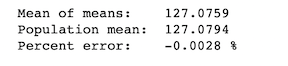

### Part C

Now we do the same for the standard deviation, we should get an std which is reduced by a factor of 10. Use the same sample parameters as for Part B. 

In [30]:
# print out the standard deviation of the collection of means, and also print out
# the percent error compared with the ground truth value. Be sure to round to 4
# decimal places and report the percent error as a percent (followed by "%"). 

std_of_means = std(sample_means)



NameError: name 'sample_means' is not defined

Hint: You should get something very close to:

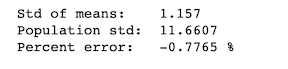

### Part D

Ok, finally let's do a sampling experiment and report our result using a confidence of 95 %. 

Complete the following template.

In [31]:
#seed(0)

# perform one sample and get parameters

N = 100

CL = 0.95

seed(0)

(x_bar,sigma_sample) = get_sample_parameters(W,N)


# report the result with confidence interval, using CL = 0.95
# Be sure to round to 4 decimal places and report the confidence level as a percent (followed by "%"). 



NameError: name 'get_sample_parameters' is not defined

## Hypothesis Testing

In lecture this week I mentioned that there are two ways to frame the paradigm of hypothesis
testing: one (which I did in lecture) emphasizes the notion of a "p-value," which is the probability
of an event happening which as as unusual, or more unusual, than the result of the experiment which
you did to test your hypothesis.  This gives you a sense for how unusual your outcome is, independent
of your level of significance. 

It is sometimes the most appropriate method, for reasons that we shall explore in Problem 7 below.  

However, the second way of framing the problem is also useful, so I would like to present it here in
case this makes more sense to you. It is another tool for your toolbox of statistical techniques. 
Instead of emphasizing the p-value, we will emphasize the level
of significance:

>  Recall that the Level of Significance (LOS) $\alpha$ of a test is the probability,
>  if you reject the hypothesis, that you will be wrong. This could happen, because,
>  although the hypothesis is correct, there is some probability that the experimental
>  result, due to the random nature of the sampling process, ends up with an extreme value. 

>  For example, your hypothesis may be that a coin is fair (has a probability of heads of 1/2),
>  so you perform a test by flipping the coin 10 times.  You may decide, upon observing 10 heads
>  in a row, that the coin is NOT fair and you should reject your hypothesis.  However, that outcome
>  has a probability of ${1\over 2^{10}} = 0.00098$ and COULD happen.  If the coin is in fact fair,
>  you would be wrong to reject it, but you have no way of knowing for certain.  All you can do is
>  state how sure you want to be in your decision, or, alternately, how probable it is that you
>  will be wrong if you reject. 

>  Note carefully in this example that if the result of your experiment is to observe 5 heads out of 10
>  flips, this does NOT give you much assurance that your hypothesis is right, because the probability
>  of heads for a coin is a statement about what would happen in an *infinite* number of flips. So one
>  run of 10 flips is not much evidence.  Thus, we can Reject our hypothesis, or Fail to Reject (just
>  leave the hypothesis as it is, as a unproven hypothesis). 

#### Critical Regions

For any distribution, we can define the three following critical regions of the PDF which
indicate the extremes of the distribution whose area is equal to the LOS. When you do an experiment to test a hypothesis, then if your result ends up in one of these regions, you should **reject** the hypothesis; of course, you might be wrong because of the random nature of the experiment, but you will only be wrong LOS percent of the time!



**Two-sided Critical Region:**  The probability/area of the LOS is distributed
      equally at both extremes of the distribution (here, we assume LOS = 5%):
      
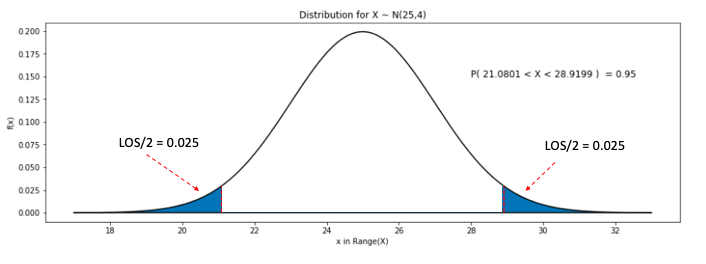      
          
**One-sided (Left) Critical Region:** The probability/area of the LOS is distributed
      entirely at the leftmost extreme of the distribution (here, we assume LOS = 10%):
      
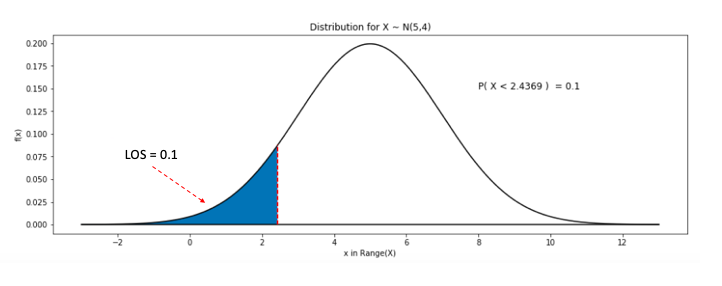

**One-sided (Right) Critical Region:** The probability/area of the LOS is distributed
      entirely at the rightmost extreme of the distribution (here, we assume LOS = 5%):
    
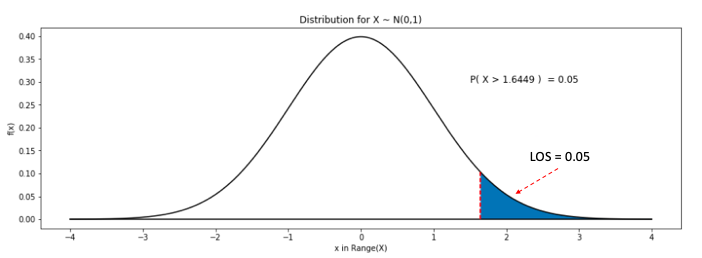

Which one to use depends on the experiment, and what you are trying to find out.
We will think about this for individual problems below and define which one to use.

###  How to use critical regions in your hypothesis tests

The procedure is then as follows:

1. State your hypothesis (in the form $\mu = k$ for some value $k$).
2. Figure out which of the three types of critical region is appropriate.
3. Give your LOS.
4. Calculate where the boundaries of the critical region are, given the distribution
   of the results of the experiment.
5. Perform the experiment, and if the result ends up in a critical region, **Reject** the hypothesis otherwise **Fail to Reject** the hypothesis. 

Hint on the calculations: In step 4, for a two-sided test, use the `interval` function from the `norm` library; for a one-sided left, use  `ppf` and for a one-sided right, use `isf`. 


## Problem Five (Hypothesis Testing)

Suppose a random number generator for a Uniform Distribution in `[0..1)` is being tested.
We know what the theoretical mean and standard deviation are supposed to be (because we know how to find the details by looking up the Uniform Distribution in Wikipedia). 

We generate 100 random values and find the mean to be 0.4365. Since the mean value could be too low or too high, this is a two-sided test. 

(A) Test this result with 5% LOS, stating whether the result is Reject or Fail to Reject. 
Show all work (i.e., give the bound calculated in step 4). 

(B) Repeat the test with 1% LOS, stating whether the result is Reject or Fail to Reject. Again, show all work. 

Hint: If you write this in Python code, you can just cut and paste your solution from (A), changing one number, to get the solution to (B). 

In [32]:
print("Solution (A)")

sd = 1/sqrt(12)
sd = sd/sqrt(100)

print(norm.interval(alpha=0.95, loc = 0.4365, scale = sd))

print("Reject")


Solution (A)
(0.3799207132961914, 0.4930792867038086)
Reject


In [33]:
print("Solution (B)")


print(norm.interval(alpha=0.99, loc = 0.5, scale = sd))

print("Fail to Reject")


Solution (B)
(0.42564221291047577, 0.5743577870895242)
Fail to Reject


## Problem Six (Hypothesis Testing)

Suppose in its advertizing, Apple claims that the pens last an average of 1600 hours. We wish to test this claim, and so we set

$$H_0:\,\mu = 1600 \text{  hours}$$ 

and  a level of significance 

$$\alpha =  0.01.$$ 

 We do an experiment where 200 Apple Pens are tested and the mean of the lifetimes is found to be 1575 hours with a  sample standard deviation of 120 hours. Since this is a large sample (>30) we may use the sample standard deviation in place of the population standard deviation.

I really want to know is whether Apple is exaggerating, and the Pens actually have a lifetime much lower
than hypothesized. Therefore we use a **one-sided (left)** critical region: if
the pens perform really poorly, we will reject our hypothesis, but if they
perform much better than expected, we will be satisfied and NOT reject. 


(A) Perform the test as just stated. Show all work, including the boundary of the critical region. 

(B) Repeat the experiment with all parameters the same except make the sample size n = 100. Show all work. 


    A.) 
        x = 1575
        u = 1600
        
        t = (1575 - 1600) / (120)/(squarerootof(200))
        t = -2.946
        
        critical value of t at 0.01 is -2.345
        
        -2.946 < -2.345
        
        Thus, REJECT
        
    B.)
    
        x = 1575
        u = 1600
        
        t = (1575 - 1600) / (120)/(squarerootof(100))
        t = -2.083
        
        critical value of t at 0.01 is -2.365
        
        -2.083 > -2.365
        
        Thus, we do NOT REJECT

In [34]:
print("Solution (A)")


print("Reject")


Solution (A)
Reject


In [35]:
print("Solution (B)")


print("Not Reject")


Solution (B)
Not Reject


## Problem Seven (Hypothesis Testing)

Suppose I want to test if Richard claims to have Extrasensory Perception (ESP), and 
that if I draw a card drawn randomly and with replacement from
an ordinary deck of cards, he can guess the suit without seeing the card.

I am sceptical and propose to test his claim.  I formulate the hypothesis that
when he tells me the suit, he is just guessing and the probability of his getting
it right is 25%. 

Therefore, I perform 100 trials where I shuffle the deck, draw a card, ask him to guess the suit, and then replace the card. 

I decide that since ESP is about guessing the card's suit correctly, I will make this a one-sided (right) test with LOS = 0.05. 

We perform the test and Richard identifies 32 of the cards correctly. 

Now at this point, I realize that if I use the normal distribution, it will be an estimate, and I am not sure how well it will work, because B(100,0.25) is not symmetric. 
So I decide for maximum precision I'll use the binomial directly, but how to calculate the critical region and an LOS that goes along with a *discrete* distribution (think about how to calculate the top 1% of B(3,1/2) for example!)? 

So in this case, the "p-value" method shown in lecture is best: I'll calculate $p = P(X \ge 32)$  and see if it is less than my LOS $\alpha$ (which would mean it has to be in the critical region). 

(A) Perform the test as specified. Reject if $p = P(X \ge 32) \le \alpha$  and Fail to Reject otherwise. 

(B) What is the smallest number of cards Richard would have to identify to
make me reject my hypothesis with $\alpha = 1 \%$?

Hint: use `binom.cdf`.  

In [36]:
print('\nSolution (A)\n')

print((1-binom.cdf(k=32, n=100, p=0.25)))
print("")
print("We Reject this b/c it is less than loc 0.05")



Solution (A)

0.04459632521268153

We Reject this b/c it is less than loc 0.05


In [37]:
print('\nSolution (B)\n')

print(1-binom.cdf(k=35, n=100,p=0.25))
print("")
print("The smallest number to identify is 35")



Solution (B)

0.009406965929982691

The smallest number to identify is 35


## Problem Eight (Hypothesis Testing on Real Data)

We will now use the data frame downloaded in Problem 4,
but extract the height data and perform a hypothesis test on it. 


### Part A

First we will read in the biometric data on heights and weights from 

>    https://cs-web.bu.edu/fac/snyder/cs237/Data/biometricdata.csv

extract the heights into a Python list, find the ground truth about the mean and standard deviation,
then perform a hypothesis test. 

For this first cell, I just want you to copy the code from the first cell in your solution to 
Problem 4, Part A, to verify that everything is working properly. The only change is to use heights
instead of weights.  Change the variable holding the weights from W to H!


In [38]:
# Use data frame from Probblem 4 Part A

# Convert column of all Heights into a Python list

H = [ 0 ]             # just to get it to compile, your code here

population_mean = mean(H)
population_std = std(H)

# print it out, should get 67.9931 1.9016



# Randomly sample weight of N individuals return mean and *sample* standard deviation as a pair
# Use choice from numpy.random
# Ok to just do it with replace=True

def get_sample_parameters(P,N):
                                                  # just to get it to compile, your code here
    return (0,0)

# test it!

seed(0)

# print them out, should get 67.6173 2.457

(x_bar_30,sigma_sample_30) = get_sample_parameters(H,30)


seed(0)

# print them out, should get 67.9344 1.9716

(x_bar_100,sigma_sample_100) = get_sample_parameters(H,100)


TypeError: 'float' object is not callable

### Part B

Now we will perform a two-sided hypothesis test using a sample size of $N=30$ and a level of significance of $\alpha = 10\%$. Our *null hypothesis* is:

>   $H_0\ =\ \mu = 65$

Perform a hypothesis test by selecting **one** sample and reporting your result (Reject or Fail to Reject) and explain your reasoning (the boundaries of the critical region, and where the sample mean falls, inside or outside the critical region). 

Remember that the normal distribution implied by the hypothesis has a mean $\mu$ specified by the null hypothesis
and a standard deviation derived from the sample (using the sample standard deviation). 

In [39]:
alpha = 0.1
mu = 65
N = 30

seed(0)     # try without the seed to see if it varies, then submit with the seed of 0

(x_bar,sigma_sample) = get_sample_parameters(H,N)



NameError: name 'get_sample_parameters' is not defined

### Part C

Repeat the hypothesis test with $N=30$, LOS $\alpha=0.05$ and null hypothesis:

>   $H_0\ =\ \mu = 64$

Again, show the result and explain by showing the sample mean and the bounds of the critical regions. 

In [40]:
alpha = 0.05
mu = 64
N = 30

seed(1)     # try without the seed to see if it varies, then submit with the seed of 1

(x_bar,sigma_sample) = get_sample_parameters(H,N)



NameError: name 'get_sample_parameters' is not defined